In [4]:
import pandas as pd
df = pd.read_csv('./Sales_data.csv')

/tmp/ipykernel_14524/3409253109.py:2: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Sales_data.csv')


In [5]:
df

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명
0,901011864201303,2021-01-05,2021-01-01,2020-12-31,35.0,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형)
1,901011864430366,2021-01-03,2021-01-01,2020-12-31,9.0,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형)
2,81231186197954,2021-01-05,2021-01-01,2020-12-31,22.0,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형)
3,812311863500220,2021-01-03,2021-01-01,2020-12-31,8.0,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형)
4,812311863220192,2021-01-03,2021-01-01,2020-12-31,23.0,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형)
...,...,...,...,...,...,...,...,...,...,...
199994,00806233401-26770461124511,2022-08-11,2022-08-08,2022-08-07,13.0,201906180918504,21300,14910,FC,라네이처 시그니처 울트라슬림 날개 중형 12개입 (EA)
199995,00806204436-0461904922687,2022-08-11,2022-08-08,2022-08-07,163.0,201901280776735,7900,5840,FC,라네이처 시그니처 맥시슬림 날개 중형 12개입 (EA)
199996,00806204436-0461904922688,2022-08-12,2022-08-08,2022-08-07,163.0,201901280776735,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 대형 10개입 (EA)
199997,00806215930-05281256126202,2022-08-10,2022-08-08,2022-08-07,5.0,201906200921415,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 소형 14개입 (EA)


In [7]:
df_d = df[df['물품대분류']=='더블하트']

In [8]:
df_d.head()

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명
17,812311862420108,2021-01-03,2021-01-01,2020-12-31,0.0,201812310749875,39200,31046,더블하트,더블하트 SofTouch 모유실감 PPSU 젖병 노꼭지 트윈팩 240ml(애니멀)
18,81231186226676,2021-01-03,2021-01-01,2020-12-31,2.0,201812310749839,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 L (2입)
19,81231186236892,2021-01-03,2021-01-01,2020-12-31,1.0,201812310749857,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
20,812311862702144,2021-01-04,2021-01-01,2020-12-31,8.0,201812310749915,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입)
21,812311863428200,2021-01-05,2021-01-01,2020-12-31,-8.0,201812310749984,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입)


,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명


In [9]:
df['구매일'] = pd.to_datetime(df['구매일'])
df_t = df_d[['구매일','결제금액']].groupby(by=['구매일'], as_index=False).sum()

In [10]:
df_t

,구매일,결제금액
0,2020-12-31,130033
1,2021-01-01,244510
2,2021-01-02,547674
3,2021-01-03,623924
4,2021-01-04,490014
...,...,...
572,2022-08-03,532573
573,2022-08-04,393532
574,2022-08-05,520466
575,2022-08-06,360004


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

matplotlib.rc('font', family = 'NanumGothic')


<AxesSubplot:>

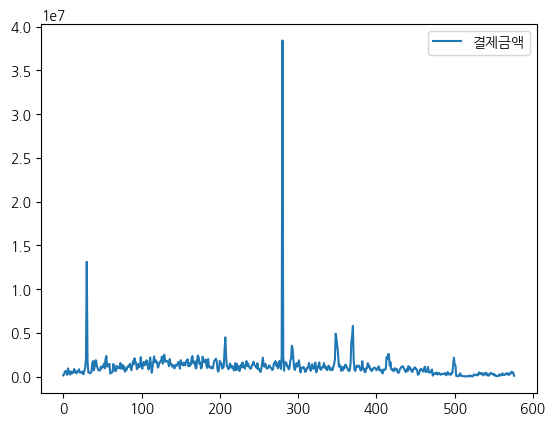

In [17]:
df_t.plot()

In [21]:
df_t[df_t['결제금액']>15000000]

,구매일,결제금액
280,2021-10-10,38411210
